In [2]:
import tensorflow as tf
import numpy as np
#
x=tf.placeholder(tf.float32,[None,2])
#权重和偏置
w1=tf.Variable(tf.constant([
    [2,1],
    [3,4]
],tf.float32))
b1=tf.Variable(tf.constant([-2,3], tf.float32))
#线性组合
l1=tf.matmul(x,w1)+b1
#对线性组合进行BN处理
mu_B,var_B=tf.nn.moments(l1,0)
gamma1=tf.Variable(tf.constant([3,2] , tf.float32))
beta1=tf.Variable(tf.constant([6,4], tf.float32))
z1=tf.nn.batch_normalization(l1,mu_B,var_B,beta1,gamma1, 1e-8)
#激活
sigma1=tf.nn.relu(z1)
#权重和偏置
w2=tf.Variable(tf.constant([
    [5,3],
    [2,8]
],tf.float32))
b2=tf.Variable(tf.constant([-4,-6], tf.float32))
#线性组合
l2=tf.matmul(sigma1,w2)+b2

#构造函数F
F=tf.reduce_sum(tf.pow(tf.reduce_sum(tf.multiply(l2, tf.constant([1,2], tf.float32)) , 1) ,2.0))

#对gamma1的偏导数
gamm1_gra=tf.gradients(F,[gamma1])
session=tf.Session()
session.run(tf.global_variables_initializer())
gamm1_gra=session.run(gamm1_gra,feed_dict={
    x:np.array(
        [
            [4,1],
            [3,3],
            [6,2]
        ],np.float32
    )
})


#打印结果
print(gamm1_gra[0][0])

4173.5205


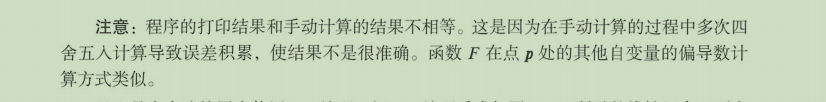